## 1.1 - Movielens full - EDA

---



 a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.
---

Jag startar med att titta över datan så att jag kan visualisera det bättre med planen att skriva ut filmer ihopsatta med deras respektive genre.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
import numpy as np

movies_path = "../../data/ml-latest/movies.csv" # testar lite utöver med en path istället för att lägga en df direkt.

movies_df = pd.read_csv(movies_path)

display(movies_df.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Med denna utskrift så kan jag se att den innehåller tre stycken olika kolumner "movieId", "title" och "genres", vi kan dock se att genre delas med ett | planen är då att ta ut den relevanta med att splitta från varje | som förekommer för att få fram god data. ChatGPT gav mig ett tips om att använda Counter för att räkna relevant data, hittade tyvärr inte dom relevanta kommandona för det så jag skriver det med hjälp av just GPT men i lärningssyfte att jag ska veta vad jag gör. 

In [31]:
from collections import Counter # ChatGPT gav mig ett gott tips att använda Counter här

movies_path = "../../data/ml-latest/movies.csv"
movies_df = pd.read_csv(movies_path)

#Splitta genrerna från | och skapa en lista med alla genre
genre_list = "|".join(movies_df["genres"]).split("|") 

# Räkna varje del av genrerna
genre_counts = Counter(genre_list)

# Konverterar genre_counts till df för snygg visualisering
genre_counts_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Movies"])

# Sortera df efter antalet filmerna i descending order
genre_counts_df = genre_counts_df.sort_values(by="Movies", ascending = False).reset_index(drop=True) 

genre_counts_df

,Genre,Movies
0,Drama,33681
1,Comedy,22830
2,Thriller,11675
3,Romance,10172
4,Action,9563
5,Documentary,9283
6,Horror,8570
7,(no genres listed),7060
8,Crime,6917
9,Adventure,5349


med detta så kan vi med lätthet göra en plot på detta, använder matplotlib för denna övning.

Jag inser att den inte går efter datavisualiserings designregler, men i detta fall är det mera för att se till att allting skrivs ut rätt och stämmer.

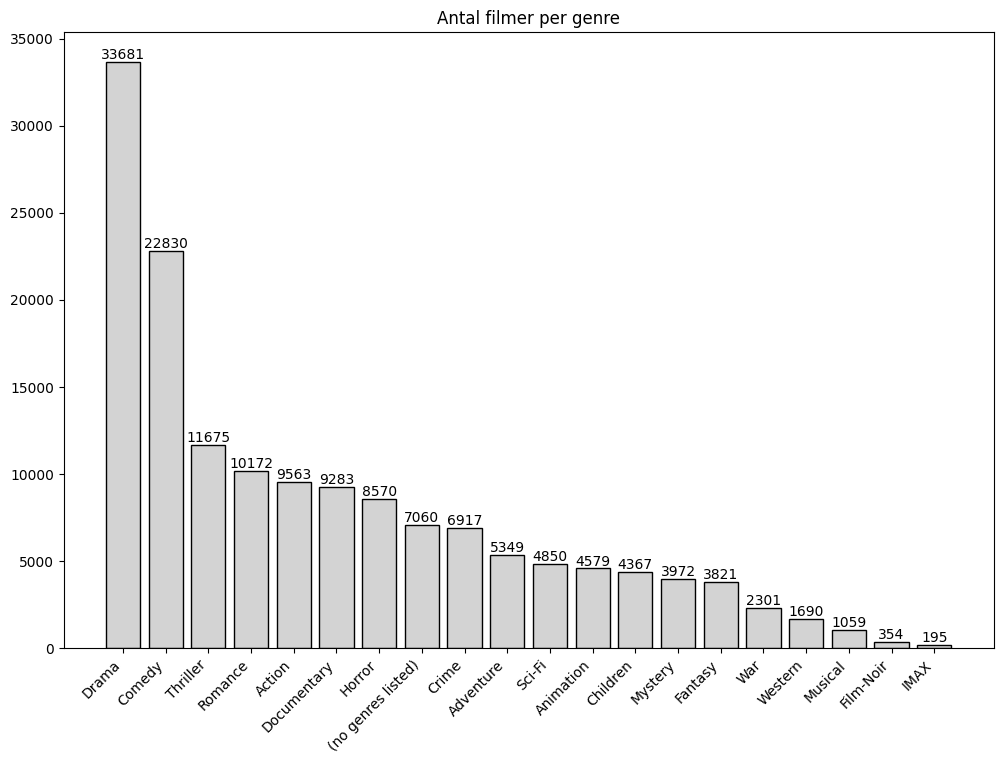

In [32]:
plt.figure(figsize=(12, 8))

plt.bar(genre_counts_df["Genre"], genre_counts_df["Movies"], color="lightgrey", edgecolor="black")

plt.title("Antal filmer per genre")

plt.xticks(rotation=45, ha="right")


#gör en uskrift av varje stapel för att dubbelkolla att siffrorna stämmer
for index, value in enumerate(genre_counts_df["Movies"]):
    plt.text(index, value, str(value), ha="center", va="bottom")

plt.show()


---

## b) Vilka är de 10 filmerna med flest ratings?

Jag startar med en ratings_df för lättare visualisering över datan jag har att jobba med.


In [33]:
ratings_path = "../../data/ml-latest/ratings.csv"

ratings_df = pd.read_csv(ratings_path)

ratings_df


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [34]:
# Gruppera ratings_df efter "movieId", räkna antalet ratings, och sortera i descending order.
c_rating = ratings_df.groupby("movieId").size().reset_index(name="count")
h_rating = c_rating.sort_values("count", ascending=False).head(10)

# Slå samman h_rating med movies_df för att få filmtitlar och genrer
h_rating_with_titles = pd.merge(h_rating, movies_df, on="movieId")

display(h_rating_with_titles[["movieId", "title", "count"]])


,movieId,title,count
0,318,"Shawshank Redemption, The (1994)",122296
1,356,Forrest Gump (1994),113581
2,296,Pulp Fiction (1994),108756
3,2571,"Matrix, The (1999)",107056
4,593,"Silence of the Lambs, The (1991)",101802
5,260,Star Wars: Episode IV - A New Hope (1977),97202
6,2959,Fight Club (1999),86207
7,527,Schindler's List (1993),84232
8,480,Jurassic Park (1993),83026
9,1196,Star Wars: Episode V - The Empire Strikes Back...,80200


---

## c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.



In [35]:
# Gruppera ratings_df efter "movieId", räkna antalet ratings och sortera descending
ratings_count = ratings_df.groupby("movieId").size().reset_index(name="count")
top_movies = ratings_count.sort_values("count", ascending=False).head(10)

# Slå samman top_movies med movies_df för att få filmtitlar
top_movies_w_titles = pd.merge(top_movies, movies_df, on="movieId")

# Filtrera ratings_df för att få ut topp 10 filmerna och beräkna genomsnittliga ratingen
top_movies_ratings = ratings_df[ratings_df["movieId"].isin(top_movies["movieId"])]
avg_ratings = top_movies_ratings.groupby("movieId")["rating"].mean().reset_index()

# Slå ihop genomsnittliga ratings med top_movies_w_titles för att visa titlar och genomsnittliga ratingar
final_results = pd.merge(top_movies_w_titles, avg_ratings, on="movieId")

# Byt namn på "rating" kolumnen till "avg rating" och avrunda till två decimaler
final_results.rename(columns={"rating": "avg rating"}, inplace=True)
final_results["avg rating"] = final_results["avg rating"].round(2)

# Sortera "final_results" baserat på "avg rating" i descending ordning
final_results_sorted = final_results.sort_values(by="avg rating", ascending=False)

#  skriv ut title och average rating
final_results_sorted[["title", "avg rating"]]


,title,avg rating
0,"Shawshank Redemption, The (1994)",4.42
6,Fight Club (1999),4.24
7,Schindler's List (1993),4.24
2,Pulp Fiction (1994),4.19
3,"Matrix, The (1999)",4.16
4,"Silence of the Lambs, The (1991)",4.15
9,Star Wars: Episode V - The Empire Strikes Back...,4.12
5,Star Wars: Episode IV - A New Hope (1977),4.09
1,Forrest Gump (1994),4.07
8,Jurassic Park (1993),3.69


---
 ## d) Gör en plot över årtal och antalet filmer representerade i datasetet.

Jag hittade först inte ett effektivt sätt att få ur datan för just årtal ur vår csv så frågade GPT efter hjälp och fick en mycket intressant lösning som jag kommer att notera kortsammafattat vad rad 6 gör här.

**"Genom att använda denna metod kan man effektivt extrahera årtal från filmernas titlar, förutsatt att de följer det konsekventa mönstret av att ha årtal inneslutna i parenteser mot slutet av titeln."** - ChatGPT

"r" med dom olika tecknerna står för att få in datan rått alltså att strängarna behandlas på ett sätt som python kan läsa av för att sedan ta in dom fyra siffrorna "d{4}" i vårt fall år, önskar jag hade sett detta i tidigare uppgifter för att jag anser att det var en väldigt effektiv och stark "bruteforce" lösning på det jag behövde, lagt en mental notering på detta och ska se hur jag kan använda det i kommande uppgifter.

Annars flöt denna uppgift på lätt, märkbart att man börjar bli varm i kläderna för just att lägga data inom grafer och vad vi kan notera är "the silver screen time" alltså när bion började bli populär för att sedan fortsätta en ökning vid vhs uppfinning för att slutligen gå starkt uppåt när vhs affärer började bli populära och sedan en stark nedgång under Covid(ett data börjar saknas vid denna tidpunkt kan också vara en stark tankegång).

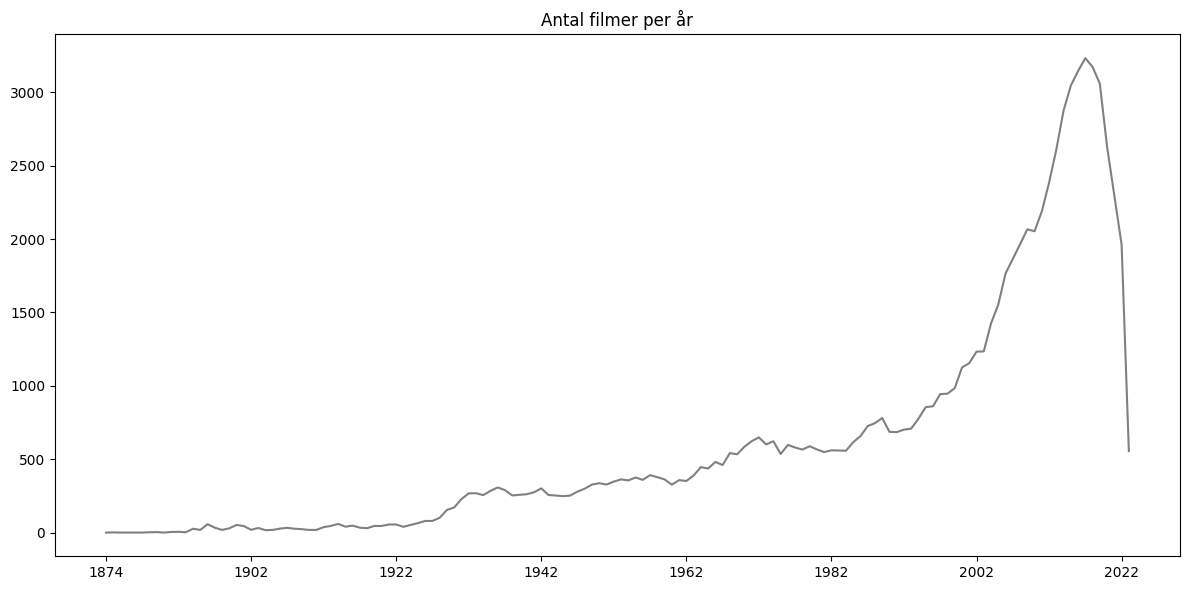

In [36]:
movies_df["year"] = movies_df["title"].str.extract(r"\((\d{4})\)") #GPT hjälp att få ut årtal 

movies_per_year = movies_df.groupby("year").size()

plt.figure(figsize=(12, 6)) # Figsize för bättre visualisering
movies_per_year.plot(kind="line", color="grey", linewidth=1.5)
plt.title("Antal filmer per år")
plt.xlabel("") # x-label som tom annars får jag ut groupby namnet
plt.tight_layout()
plt.show()


---

 ## e) Gör en plot över antalet ratings mot movieId

Jag tolkade denna uppgift som att vi skulle beräkna ratings för att sedan visualliera, men efter att prata med min klasskamrat så kunde man också tolka att man endast behövde skriva ut alla ratings i en scatter, lägger upp båda lösningarna här
 dock vad vi kan få fram ifrån datan så ger folk vanligtvis en mitten rating över att gå till dom extrema åt något håll.

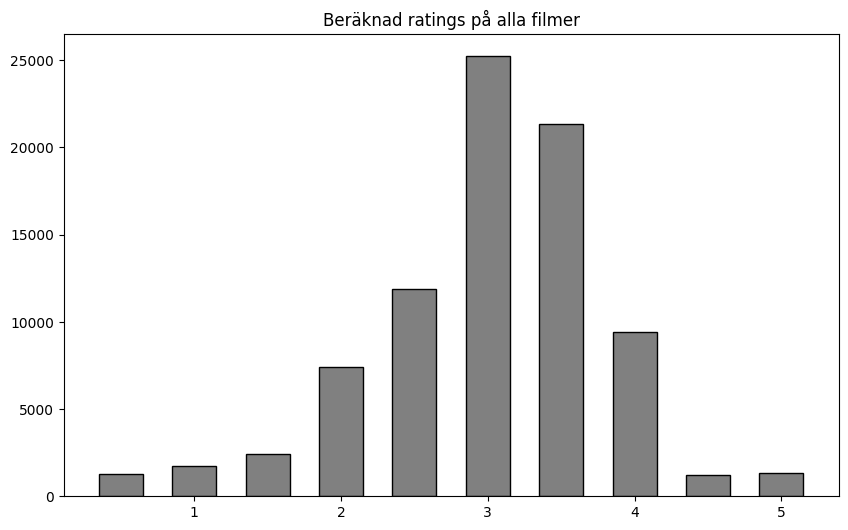

In [37]:
# Beräkna det genomsnittliga betyg för varje film.
average_ratings = ratings_df.groupby("movieId")["rating"].mean()

# Avrunda betyg till närmaste halva nummer.
rounded_ratings = (average_ratings * 2).round() / 2

# räkna på filmers rating, sortera därefter
ratings_counts = rounded_ratings.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(ratings_counts.index, ratings_counts.values, color="grey", edgecolor="black", width=0.3)
plt.title("Beräknad ratings på alla filmer")
plt.show()


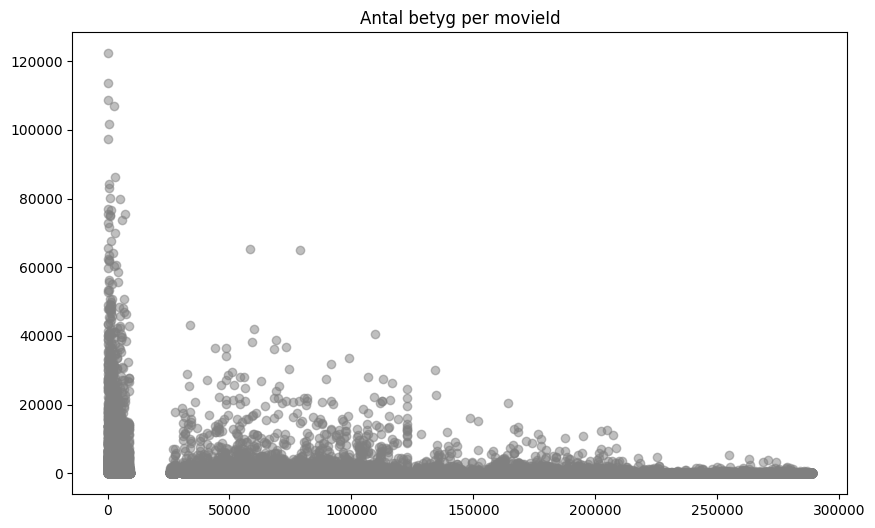

In [38]:
df_ratings = pd.read_csv(ratings_path)

ratings_per_movie = df_ratings["movieId"].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(ratings_per_movie.index, ratings_per_movie.values, color="grey", alpha=0.5)
plt.title("Antal betyg per movieId")
plt.show()


---

##  f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

Stapeldiagram blev fullt och svårt att läsa la det som en piechart istället. (OBS gick lite utanför uppgiften eftersom C och F var så lika)

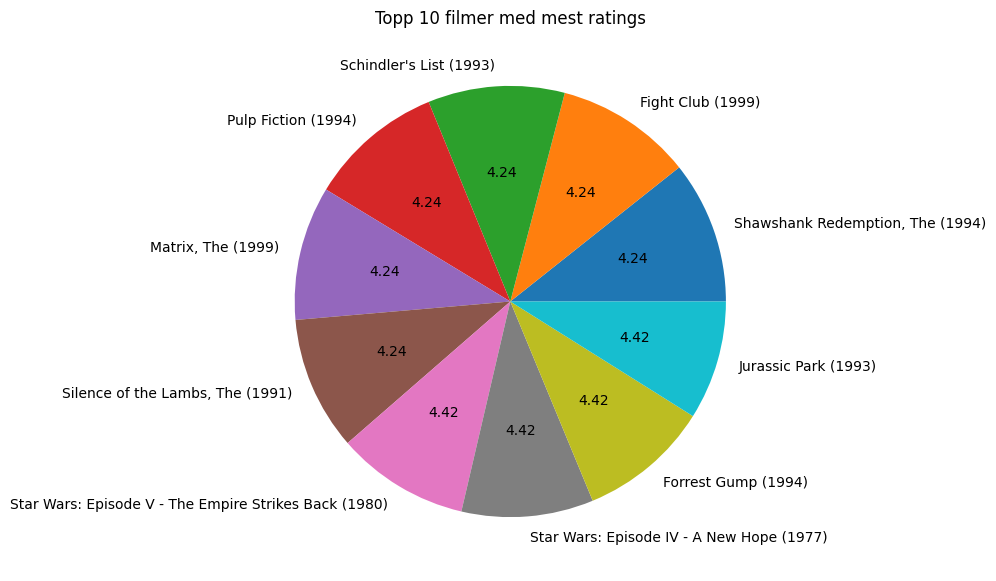

,title,avg rating
0,"Shawshank Redemption, The (1994)",4.42
6,Fight Club (1999),4.24
7,Schindler's List (1993),4.24
2,Pulp Fiction (1994),4.19
3,"Matrix, The (1999)",4.16
4,"Silence of the Lambs, The (1991)",4.15
9,Star Wars: Episode V - The Empire Strikes Back...,4.12
5,Star Wars: Episode IV - A New Hope (1977),4.09
1,Forrest Gump (1994),4.07
8,Jurassic Park (1993),3.69


In [39]:
# avrunda till 2 decimaler, sortera datan
avg_ratings = ["{:.2f}".format(rating) for rating in final_results_sorted["avg rating"].head(10)]

plt.figure(figsize=(14, 7))

# Vår beräkning för att få ut rätt average.
plt.pie(final_results_sorted["avg rating"].head(10), labels=final_results_sorted["title"].head(10),
        autopct=lambda pct: avg_ratings[int(pct/100*len(avg_ratings)) % len(avg_ratings)])

plt.title("Topp 10 filmer med mest ratings")
plt.show()
final_results_sorted[["title", "avg rating"]] #Dubbelkollar datan



---
## 1.2 Skapa gles matris

Jag hade lite svårt att ge mig in i denna uppgift först men efter att bla kolla https://www.youtube.com/watch?v=Xn35Ac_fGrA och gått igenom kursmaterialet igen så fick jag en bredare förståelse,mental notering att läsa igenom kursmaterialet en extra gång mer än vad jag tror jag behöver utan att slänga mig in i dom "roligare" uppgifterna men jag filtrerar mitt datasätt med att ta bort filmer från 1977 och tidigare eftersom då får vi en lägre siffra att tugga igenom, anledning att 1977 är kvar är för att en av dom bäst betygsatta filmerna ligger där och sedan klipper jag av vid 2019 eftersom det började komma ut färre filmer då, jag tog även bort ratings under 1.5 och över 4.5 eftesom det var så "få" i jämförelse med det i mitten för en snabbare beräkning.


In [40]:

# Filterar ut, imax och Film noir.
filtered_movies_df = movies_df[~movies_df["genres"].str.contains("IMAX|Film-Noir")].copy()

# Som i tidigare uppgift, av någon anledning så fick jag Na på vissa år denna gång alltså somliga titlar hade inte  i sig.
filtered_movies_df["year"] = filtered_movies_df["title"].str.extract(r"\((\d{4})\)")[0]
filtered_movies_df["year"] = pd.to_numeric(filtered_movies_df["year"], errors="coerce")
# Tar inte upp titlar utan år.
filtered_movies_df.dropna(subset=["year"], inplace=True)
filtered_movies_df["year"] = filtered_movies_df["year"].astype(int)

# Filtrerar ut tidigare än 1977 och efter 2019
filtered_movies_df = filtered_movies_df[(filtered_movies_df["year"] >= 1977) & (filtered_movies_df["year"] <= 2019)]

# få ut vår filtrerade df
filtered_ratings_df = ratings_df[ratings_df["movieId"].isin(filtered_movies_df["movieId"])]

# Filtrerar ut våran ratings.
filtered_ratings_df = filtered_ratings_df[(filtered_ratings_df["rating"] > 1.5) & (filtered_ratings_df["rating"] < 4.5)]

display(filtered_movies_df.head())
display(filtered_ratings_df.head())


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
5,1,381,3.5,1225734105
8,1,1049,3.0,1225734079


In [41]:
display(filtered_ratings_df.head())

user_categories = filtered_ratings_df["userId"].astype("category").cat
movie_categories = filtered_ratings_df["movieId"].astype("category").cat

sparse_matrix = csc_matrix(
    (filtered_ratings_df["rating"], (user_categories.codes, movie_categories.codes)),
    shape=(user_categories.categories.size, movie_categories.categories.size)
)

print(sparse_matrix)
print("Sparse matrix shape:", sparse_matrix.shape)
print("Non-zero entries:", sparse_matrix.nnz)  

# Vi ser att (0,0) alltså userId 1 har gett en rating på 4 och likaså (9, 0) alltså userId 8 en 3:a så vår beräkning stämmer

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
5,1,381,3.5,1225734105
8,1,1049,3.0,1225734079


  (0, 0)	4.0
  (6, 0)	4.0
  (9, 0)	3.0
  (13, 0)	2.5
  (19, 0)	3.0
  (30, 0)	3.5
  (33, 0)	4.0
  (40, 0)	4.0
  (42, 0)	3.5
  (50, 0)	3.5
  (51, 0)	4.0
  (54, 0)	3.5
  (62, 0)	3.5
  (66, 0)	4.0
  (86, 0)	4.0
  (87, 0)	3.0
  (88, 0)	4.0
  (89, 0)	3.0
  (95, 0)	4.0
  (102, 0)	4.0
  (114, 0)	4.0
  (126, 0)	3.0
  (132, 0)	3.5
  (136, 0)	3.0
  (137, 0)	4.0
  :	:
  (244961, 53377)	4.0
  (299764, 53378)	3.0
  (149307, 53379)	3.0
  (15449, 53380)	3.0
  (42705, 53381)	3.0
  (131022, 53381)	2.5
  (227692, 53382)	3.5
  (147549, 53383)	4.0
  (119287, 53384)	2.5
  (149307, 53385)	3.0
  (6674, 53386)	3.5
  (67738, 53386)	4.0
  (67738, 53387)	4.0
  (86555, 53387)	4.0
  (157965, 53387)	3.5
  (212417, 53388)	4.0
  (218239, 53389)	2.0
  (160705, 53390)	3.0
  (90684, 53391)	3.0
  (85029, 53392)	3.0
  (186045, 53393)	3.5
  (160705, 53394)	2.0
  (294187, 53395)	2.0
  (172740, 53396)	2.0
  (159814, 53397)	2.5
Sparse matrix shape: (315926, 53398)
Non-zero entries: 20122524


## 1.3 Recommender system

Med denna uppgift så kan vi starta med det logiska felet i "uppgift1_0" 

---
---

### 2.0 - EDA uppvärmning

OBS sätter inte in denna i gitignore eftersom den är under 1mb och underlättar för mig när jag jobbar över flera maskiner.

Använd pandas, matplotlib och seaborn för att besvara på följande frågor för datasetet:


---
  a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [42]:
# startar med en utskrift av datan för att se vad vi har att jobba med 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../../data/cardio_train.csv"
data = pd.read_csv(file_path, sep=";")  # Separator för lättare läsning av datan

data.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [43]:
# Räkna antalet positiva och negativa tagen från kaggle för att finna rätt data
count_cardio = data["cardio"].value_counts()


print(f"Positiva: {count_cardio[1]}")
print(f"Negativa: {count_cardio[0]}")


Positiva: 34979
Negativa: 35021


Undersökningen har nästan en 50/50 split i hjärt sjukdomar vs icke sjukdomar.

---
b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

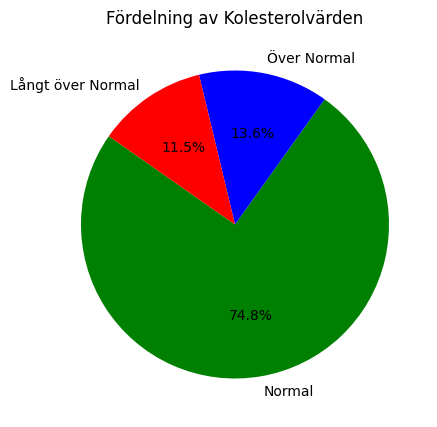

In [44]:
cholesterol_counts = data["cholesterol"].value_counts(normalize=True)  # normalize=true ger andelen istället för räkningen 

labels = ["Normal", "Över Normal", "Långt över Normal"]
colors = ["green","blue","red"]
plt.figure(figsize=(5, 5))
plt.pie(cholesterol_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=145)
plt.title("Fördelning av Kolesterolvärden")
plt.show()


Vi kan dra slutsatsen att "långt över normal" och "över normal" är nästan lika många i undersökningen.

---
c) Hur ser åldersfördelningen ut? Rita ett histogram.

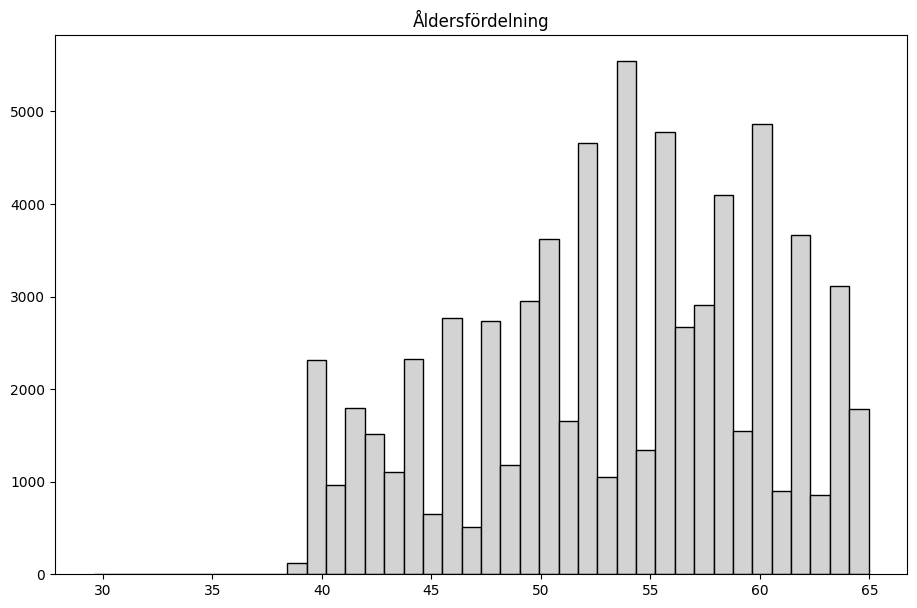

In [45]:
# dagar till år
data["age"] = data["age"] / 365

# Skapa ett histogram över åldern
plt.figure(figsize=(11, 7))

#bins för att få ut en mera strukturerad data(tack igen w3school)
plt.hist(data["age"], bins=40, color="lightgrey", edgecolor="black")
plt.title("Åldersfördelning")
plt.show()


Undersökningen har personer mellan åldern ~40 till 65 år.

---
 d) Hur stor andel röker?


In [46]:
rökare = data["smoke"].sum()  
total = len(data)

rökare_procent = (rökare / total) * 100

# avrundar till 2 decimaler
print(f"Personer som röker i %: {rökare_procent:.2f}%")


Personer som röker i %: 8.81%


Lågt antal rökare inom undersökningen.

---
 e) Hur ser viktfördelningen ut? Rita lämpligt diagram

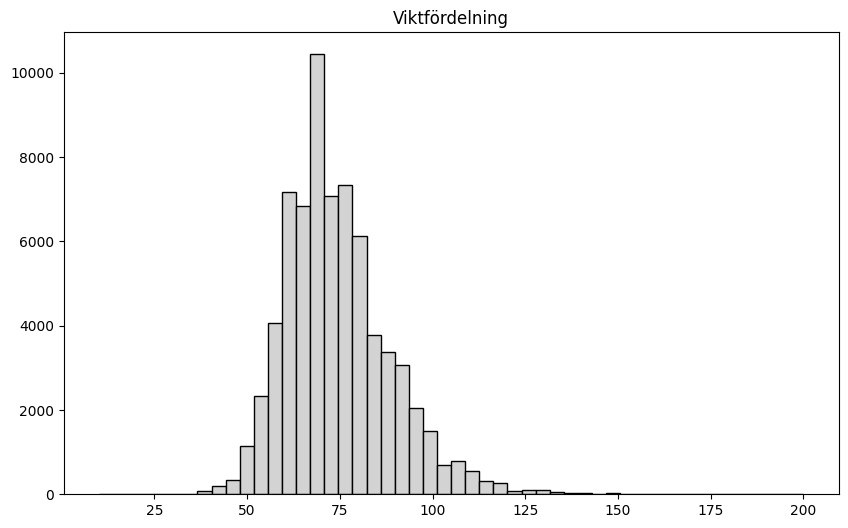

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(data["weight"], bins=50, color="lightgrey", edgecolor="black")
plt.title("Viktfördelning")
plt.show()


Dom mesta inom undersökningen väger ~65 kg.

---

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

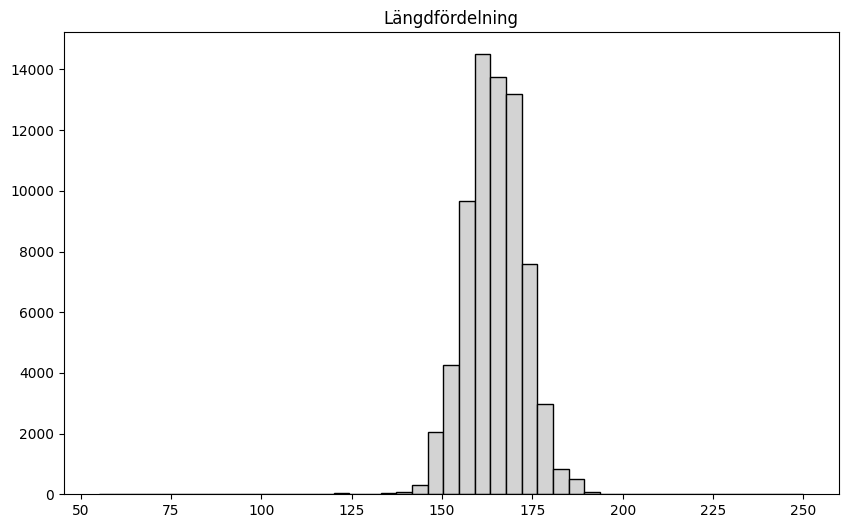

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data["height"], bins=45, color="lightgrey", edgecolor="black")
plt.title("Längdfördelning")
plt.show()


Dom mesta inom undersökningen är  ~165 cm långa.

---
  g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram.

  Med tanke på att datan inte klarifierar vad som är män eller kvinnor inom datan så kommer jag göra en gissning på vad som är vad här.

In [49]:
# kollar över datan, som inte klarifierar vilket kön tillhör vad.
data["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

OBS har tydligen lärt mig gamla kommandon så fick en future warning, denna är genomkörd av GPT för att få bort det, men slutresultatet är det samma!

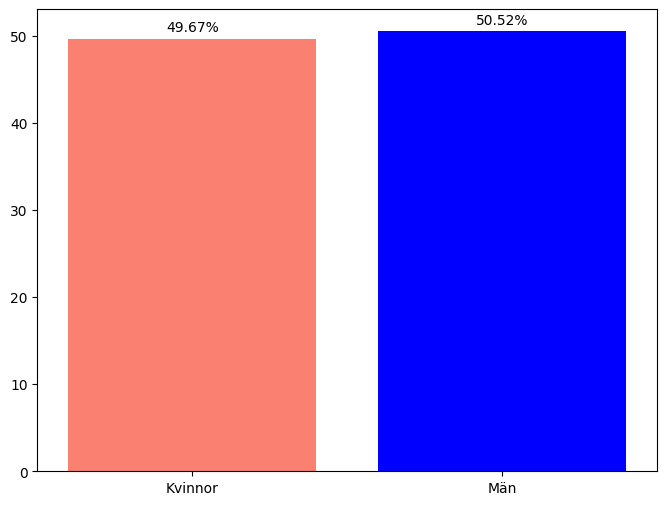

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' DataFrame is already loaded
total = data["gender"].value_counts()

cardio_disease_true = data[data["cardio"] == 1]
gender_w_disease = cardio_disease_true["gender"].value_counts()

perc_w_disease = (gender_w_disease / total) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=perc_w_disease.index, y=perc_w_disease.values)
plt.xticks([0, 1], ["Kvinnor", "Män"])
plt.xlabel("")

# Setting custom colors for each category
colors = ["salmon", "blue"]
for patch, color in zip(barplot.patches, colors):
    patch.set_facecolor(color)

# Adding percentage labels over the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ".2f") + "%",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center",
                     size=10, xytext=(0, 8),
                     textcoords="offset points")

plt.show()


In [51]:
# Dubbelkollar datan.
total_gender_counts = data["gender"].value_counts()

gender_counts_with_disease = data[data["cardio"] == 1]["gender"].value_counts()

# Beräkna procentandelen av varje kön med hjärt-kärlsjukdom
percentage_with_disease = (gender_counts_with_disease / total_gender_counts) * 100

# Skriv ut totala antalet och procentandelen, avrundar till två decimaltal.
for gender, count in total_gender_counts.items():
    gender_str = "Kvinnor" if gender == 1 else "Män"
    print(f"Totalt antal {gender_str}: {count}")
    print(f"Antal {gender_str} med hjärt-kärlsjukdom: {gender_counts_with_disease[gender]}")
    print(f"Andel {gender_str} med hjärt-kärlsjukdom: {percentage_with_disease[gender]:.2f}%\n")


Totalt antal Kvinnor: 45530
Antal Kvinnor med hjärt-kärlsjukdom: 22616
Andel Kvinnor med hjärt-kärlsjukdom: 49.67%

Totalt antal Män: 24470
Antal Män med hjärt-kärlsjukdom: 12363
Andel Män med hjärt-kärlsjukdom: 50.52%



Vi kan notera att det är mer kvinnor(om 1 i detta fall är kvinnor) som har hjärt sjukdomar men att andelen inom varje är nästan en 50/50 split. Notera väl antal vs hur många med en sjukdom, ändå kommer vi till en så nära procentuell beräkning.

---
# 2.1.0 - Feature engineering BMI


a) Skapa en feature för BMI (Body Mass Index) och släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket
range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.

 b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese
(class II), obese (class III).

In [52]:
# Kalkulation av BMI avrundat till två decimaler.
def calculate_bmi(weight_kg, height_cm):
    height_m = height_cm / 100 # Konvertera till meter.
    bmi = weight_kg / (height_m ** 2)  # BMI formulan
    return round(bmi, 2)



# Definerar BMI och lägger det till en kategori.
bmi_cat = ["underweight", "normal", "overweight", "obese I", "obese II", "obese III"]
bmi_val = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]

# GPT hjälp, vi definerar till rätt data.
data["bmi_category"] = pd.cut(data["bmi"], bins=bmi_val, labels=bmi_cat, include_lowest=True)

# Tar bort "orimlig" data i detta fall BMI uner 15 och över 50
BMI_data_added = data[(data['bmi'] >= 15) & (data['bmi'] <= 50)]

BMI_data_added.head()


KeyError: 'bmi'

2.1.1 - Feature engineering blodtryck
Släng bort samples med orimliga blodtryck och outliers. Likt uppgift 2.1.0 är det inte trivialt att sätta
gränserna.

loc method igen

In [ ]:

def classify_blood_pressure(row):
    if row["ap_hi"] > 180 and row["ap_lo"] > 120:
        return "Hypertension Crisis"
    elif row["ap_hi"] >= 140 and row["ap_lo"] >= 90:
        return "Stage 2 Hypertension"
    elif (row["ap_hi"] >= 130 and row["ap_hi"] <= 139) and (row["ap_lo"] >= 80 and row["ap_lo"] <= 89):
        return "Stage 1 Hypertension"
    elif (row["ap_hi"] >= 120 and row["ap_hi"] <= 129) and row["ap_lo"] < 80:
        return "Elevated"
    elif row["ap_hi"] < 120 and row["ap_lo"] < 80:
        return "Healthy"
    else:
        return "Unclassified"

data_filtered = data[(data["ap_hi"] >= 90) & (data["ap_hi"] <= 250) & (data["ap_lo"] >= 40) & (data["ap_lo"] <= 150)].copy()

data_filtered["bp_category"] = data_filtered.apply(classify_blood_pressure, axis=1)

data_filtered = data_filtered[data_filtered["bp_category"] != "Unclassified"]

display(data_filtered[["ap_hi", "ap_lo", "bp_category"]])

data


,ap_hi,ap_lo,bp_category
1,140,90,Stage 2 Hypertension
3,150,100,Stage 2 Hypertension
4,100,60,Healthy
6,130,80,Stage 1 Hypertension
8,110,70,Healthy
...,...,...,...
69990,110,70,Healthy
69992,170,90,Stage 2 Hypertension
69996,140,90,Stage 2 Hypertension
69997,180,90,Stage 2 Hypertension


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,ap_hi_bin,ap_lo_bin
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.97,normal,<120,<80
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.93,obese II,120-140,80-90
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.51,normal,120-140,<80
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.71,overweight,140-160,90-100
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.01,normal,<120,<80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.93,overweight,<120,<80
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.47,obese III,120-140,80-90
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.35,obese I,160-180,80-90
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.10,overweight,120-140,<80


2.2.0 - Visualisera andel sjukdomar
Skapa barplots med en feature mot andelen positiva för hjärt-kärl sjukdom. Exempelvis blodtryckskategorier
mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.

C:\Users\lager\AppData\Local\Temp\ipykernel_15292\1480253235.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_agg = data.groupby('bmi_category')['cardio'].mean().reset_index()
C:\Users\lager\AppData\Local\Temp\ipykernel_15292\1480253235.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ap_hi_agg = data.groupby('ap_hi_bin')['cardio'].mean().reset_index()
C:\Users\lager\AppData\Local\Temp\ipykernel_15292\1480253235.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True

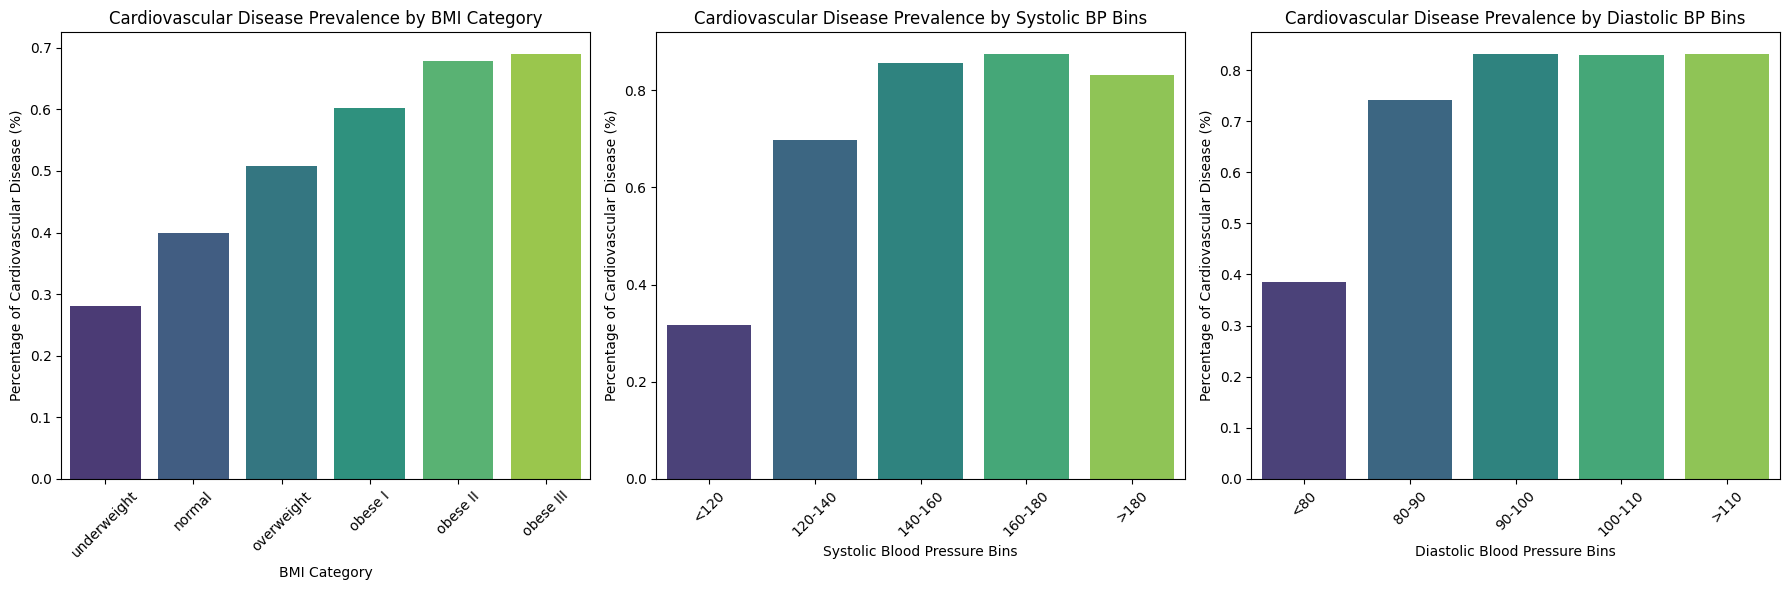

In [ ]:


# Assuming "data" is already loaded and contains "cardio", "bmi", "ap_hi", "ap_lo"

# Bin the blood pressure values as before
data["ap_hi_bin"] = pd.cut(data["ap_hi"], bins=[0, 120, 140, 160, 180, np.inf], labels=["<120", "120-140", "140-160", "160-180", ">180"])
data["ap_lo_bin"] = pd.cut(data["ap_lo"], bins=[0, 80, 90, 100, 110, np.inf], labels=["<80", "80-90", "90-100", "100-110", ">110"])

# Calculate the prevalence of cardiovascular diseases within each bin
bmi_agg = data.groupby("bmi_category")["cardio"].mean().reset_index()
ap_hi_agg = data.groupby("ap_hi_bin")["cardio"].mean().reset_index()
ap_lo_agg = data.groupby("ap_lo_bin")["cardio"].mean().reset_index()

# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted for 3 subplots

# Bar plot for BMI categories
sns.barplot(x="bmi_category", y="cardio", data=bmi_agg, ax=ax[0], palette="viridis")
ax[0].set_title("Cardiovascular Disease Prevalence by BMI Category")
ax[0].set_ylabel("Percentage of Cardiovascular Disease (%)")
ax[0].set_xlabel("BMI Category")
ax[0].tick_params(axis="x", rotation=45)

# Bar plot for systolic blood pressure categories
sns.barplot(x="ap_hi_bin", y="cardio", data=ap_hi_agg, ax=ax[1], palette="viridis")
ax[1].set_title("Cardiovascular Disease Prevalence by Systolic BP Bins")
ax[1].set_ylabel("Percentage of Cardiovascular Disease (%)")
ax[1].set_xlabel("Systolic Blood Pressure Bins")
ax[1].tick_params(axis="x", rotation=45)

# Bar plot for diastolic blood pressure categories
sns.barplot(x="ap_lo_bin", y="cardio", data=ap_lo_agg, ax=ax[2], palette="viridis")
ax[2].set_title("Cardiovascular Disease Prevalence by Diastolic BP Bins")
ax[2].set_ylabel("Percentage of Cardiovascular Disease (%)")
ax[2].set_xlabel("Diastolic Blood Pressure Bins")
ax[2].tick_params(axis="x", rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


2.2.1 - Visualisera korrelation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing the relevant health data

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
heatmap.set_title('Heatmap of Feature Correlations')

# Show the plot
plt.show()


ValueError: could not convert string to float: 'normal'

2.2.2 - Ta bort korrelerade features

Efter diskussion så är dom ju så nära att det inte behövs...

2.3 - Välja modell
Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt och gör följande:
* train|validation|test split
* skala datasetet med feature standardization eller normalization
* definiera hyperparametrar (param_grids) att testa för varje modell
* använda GridSearchCV() och välja lämplig evalueringsmetric
* gör prediction på valideringsdata


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Example: Load your dataset here
# data = pd.read_csv('path_to_your_data.csv')

# Features and target
X = data.drop('cardio', axis=1)
y = data['cardio']

# Splitting the dataset into the Training set, Validation set, and Test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the models and their hyperparameters
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Use GridSearchCV to find the best parameters for each model
results = {}
for model_name, mp in model_params.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

# Evaluate each model on validation data
for model_name, result in results.items():
    y_pred = result['best_estimator'].predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} accuracy: {accuracy:.2f}")



LogisticRegression accuracy: 0.72
RandomForest accuracy: 0.74
GradientBoosting accuracy: 0.74


2.4 Ensemble
Använd VotingClassifier() på datasetet som du valt och lägg in de bästa parametrarna för respektive
modell.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assume data is loaded and best_params is known from previous tuning
# Example best parameters (replace these with your actual best parameters found from GridSearchCV)
best_params_lr = {'C': 10}
best_params_rf = {'n_estimators': 100, 'max_depth': 10}
best_params_svc = {'C': 1, 'kernel': 'rbf'}

# Initialize models with the best parameters
lr = LogisticRegression(C=best_params_lr['C'])
rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'])
svc = SVC(C=best_params_svc['C'], kernel=best_params_svc['kernel'], probability=True)  # probability=True for voting

# Create a VotingClassifier with models
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('svc', svc)],
    voting='soft'  # 'soft' for weighted probabilities, 'hard' for majority voting
)

# Assuming X_train, X_val have been defined and data scaled appropriately
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Fit the VotingClassifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate on the validation set
y_pred = voting_clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of Voting Classifier on validation data: {accuracy:.2f}")


NameError: name 'scaler' is not defined

2.5 Evalueringar
Gör confusion matrices och classification reports för 2.4 och 2.5.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'voting_clf' and other individual models ('lr', 'rf', 'svc') are already trained
# And 'X_val_scaled', 'y_val' are defined as your validation sets

# Predictions for Voting Classifier
y_pred_voting = voting_clf.predict(X_val_scaled)

# Predictions for individual models
y_pred_lr = lr.predict(X_val_scaled)
y_pred_rf = rf.predict(X_val_scaled)
y_pred_svc = svc.predict(X_val_scaled)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_val, y_pred_voting, title='Confusion Matrix for Voting Classifier')
plot_confusion_matrix(y_val, y_pred_lr, title='Confusion Matrix for Logistic Regression')
plot_confusion_matrix(y_val, y_pred_rf, title='Confusion Matrix for Random Forest')
plot_confusion_matrix(y_val, y_pred_svc, title='Confusion Matrix for SVC')

# Print classification reports
print("Classification Report for Voting Classifier:")
print(classification_report(y_val, y_pred_voting))

print("Classification Report for Logistic Regression:")
print(classification_report(y_val, y_pred_lr))

print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf))

print("Classification Report for SVC:")
print(classification_report(y_val, y_pred_svc))


NameError: name 'voting_clf' is not defined